# Edge Detection Techniques

<pre>
Consider a medical image from your medical image dataset selected. Implement different edge detection techniques such as:
	a. Sobel (Vary dx, vary dy, vary both and observe the output)
	b. Prewitt
	c. Laplacian
	d. Canny Edge Detector (Vary for 3 sets of threshold values).
Compare the results and conclude which edge detection technique is good for your input medical image.
</pre>

# Kaggle Dataset

## Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Get key

In [ ]:
!mkdir /root/.kaggle/
!cp /drive/MyDrive/kaggle.json /root/.kaggle/

## Download dataset

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=6d627107f77fdfd2de7db83dcb21227e54f9d97a40d86d0ecf4e52a43b4952b9
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.49G/9.51G [00:47<00:00, 227MB/s]
100% 9.51G/9.51G [00:47<00:00, 214MB/s]


In [ ]:
!unzip -qq aptos2019-blindness-detection.zip

# Get image to work on from dataset

In [ ]:
# get file name
import os

IMAGE_DIR = "train_images"
IMAGE_NAME = os.listdir(IMAGE_DIR)[0]
print(IMAGE_NAME)

0243404e8a00.png


# Get image from web

In [ ]:
!wget https://media.wired.com/photos/5c523ece95d28a2cb5b76db1/1:1/w_494,h_494,c_limit/Backchannel-Lena-Soderberg-FA.jpg -O image_reserve.jpg
IMAGE_DIR_2 = ""
IMAGE_NAME_2 = "image_reserve.jpg"

--2022-02-13 16:54:19--  https://media.wired.com/photos/5c523ece95d28a2cb5b76db1/1:1/w_494,h_494,c_limit/Backchannel-Lena-Soderberg-FA.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54209 (53K) [image/jpeg]
Saving to: ‘image_reserve.jpg’

image_reserve.jpg   100%[===================>]  52.94K  --.-KB/s    in 0.01s   

2022-02-13 16:54:19 (4.78 MB/s) - ‘image_reserve.jpg’ saved [54209/54209]



# Loading and resizing image

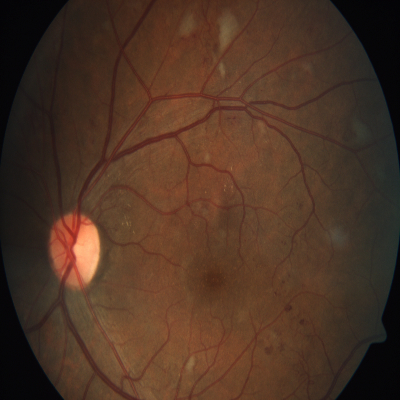

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

IMG_ORIGINAL = cv2.imread(os.path.join(IMAGE_DIR, IMAGE_NAME))

MAX_PIXEL = 255

# resize for better visibility
IMAGE_SIZE = (400, 400)
IMG = cv2.resize(IMG_ORIGINAL, IMAGE_SIZE)
cv2_imshow(IMG)

# Grayscale image

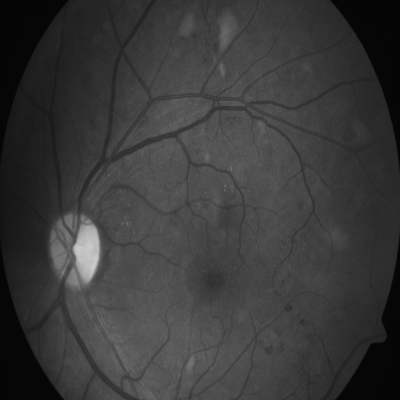

In [ ]:
IMG_GRAY = cv2.cvtColor(IMG, cv2.COLOR_BGR2GRAY)
cv2_imshow(IMG_GRAY)

# Side by side printer

In [ ]:
def h_printer(*images):
  return cv2.hconcat([img.astype('int32') for img in images])

# Blurring the image a bit

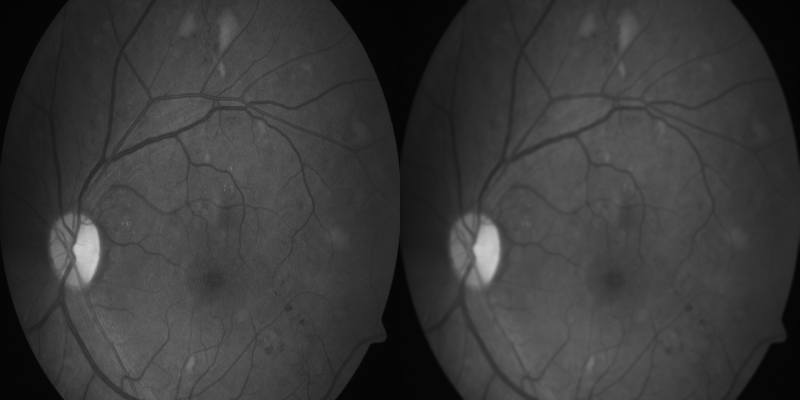

In [ ]:
IMG_BLUR = cv2.GaussianBlur(IMG_GRAY, (5,5), 0)
cv2_imshow(h_printer(IMG_GRAY, IMG_BLUR))

# Sobel

## Trial 1
- X=1
- Y=1
- X=1 , Y=1

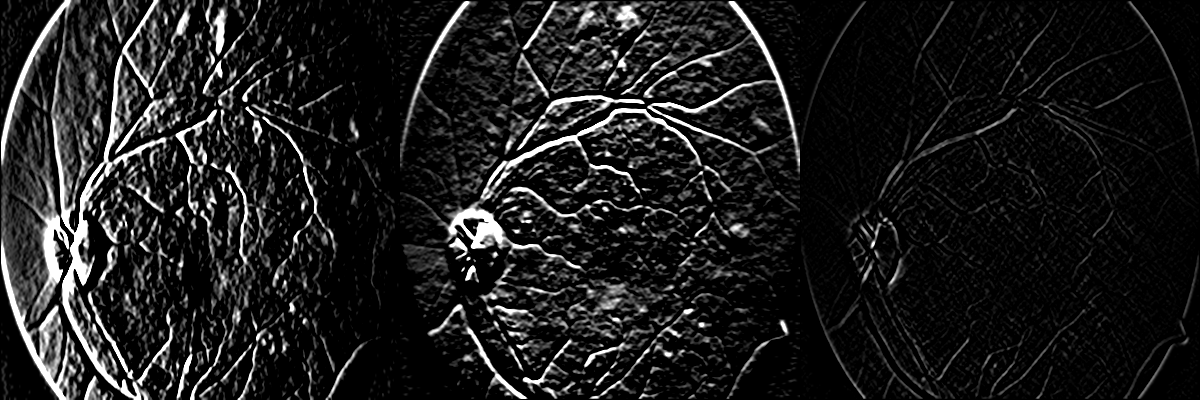

In [ ]:
sobelx = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
cv2_imshow(h_printer(sobelx, sobely, sobelxy))

## Trial 2
- X=1
- Y=2
- X=1 , Y=2

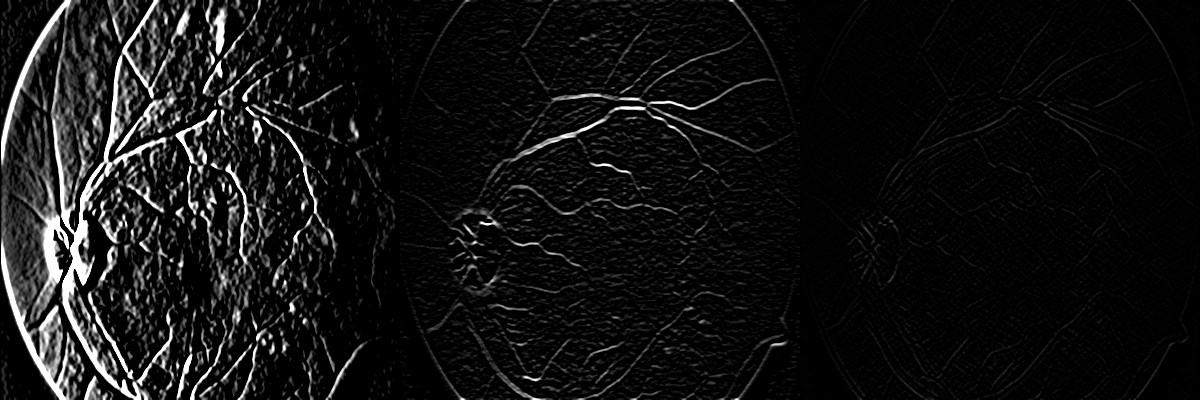

In [ ]:
sobelx = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=0, dy=2, ksize=5)
sobelxy = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=1, dy=2, ksize=5)
cv2_imshow(h_printer(sobelx, sobely, sobelxy))

## Trial 1
- X=2
- Y=1
- X=2 , Y=1

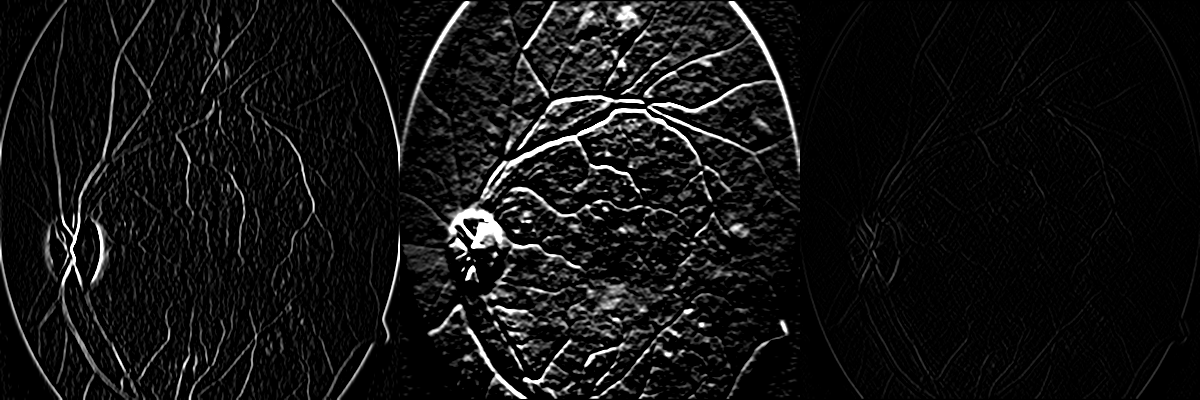

In [ ]:
sobelx = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=2, dy=0, ksize=5)
sobely = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=IMG_BLUR, ddepth=cv2.CV_64F, dx=2, dy=1, ksize=5)
cv2_imshow(h_printer(sobelx, sobely, sobelxy))

# Laplace

## Trial 1

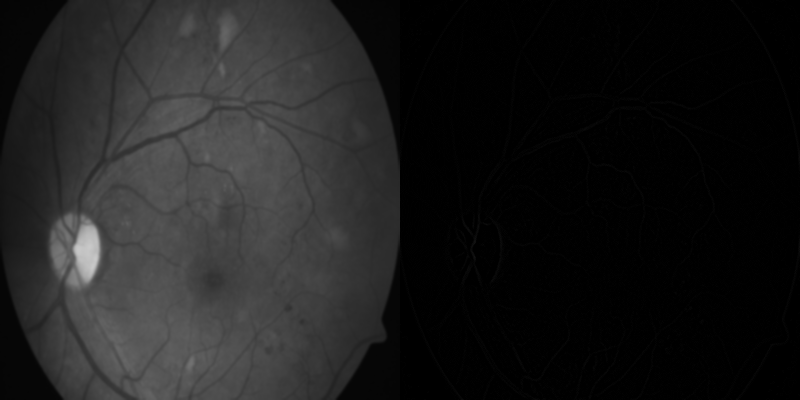

In [ ]:
laplace = cv2.Laplacian(IMG_BLUR, cv2.CV_64F)
cv2_imshow(h_printer(IMG_BLUR, laplace))

## Trial 2
On a more diverse image

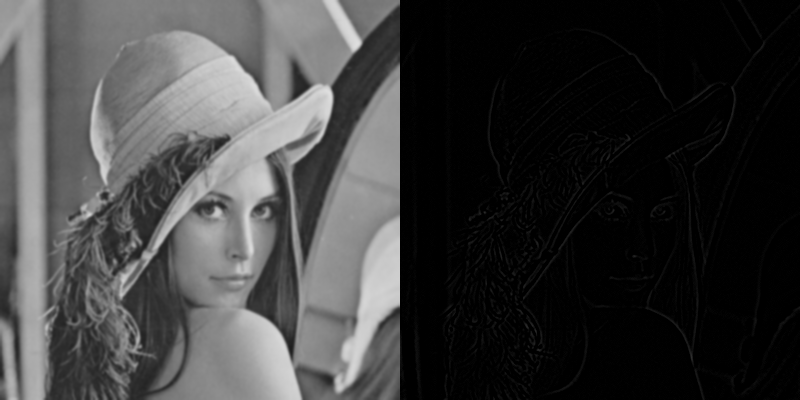

In [ ]:
IMG_ORIGINAL_2 = cv2.imread(os.path.join(IMAGE_DIR_2, IMAGE_NAME_2))
IMG_2 = cv2.resize(IMG_ORIGINAL_2, IMAGE_SIZE)
IMG_GRAY_2 = cv2.cvtColor(IMG_2, cv2.COLOR_BGR2GRAY)
IMG_BLUR_2 = cv2.GaussianBlur(IMG_GRAY_2, (5,5), 0)

laplace = cv2.Laplacian(IMG_BLUR_2, cv2.CV_64F)
cv2_imshow(h_printer(IMG_BLUR_2, laplace))

Outlines are a lot more clearly visible here

# Canny

## Trial 1
- Lower thresh = 15
- Upper thresh = 75

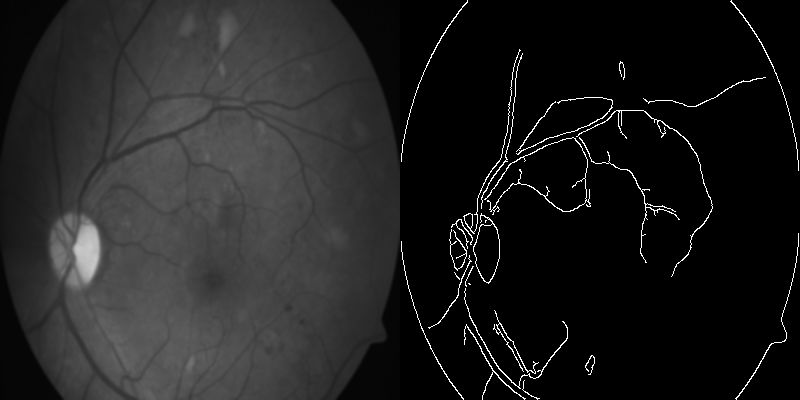

In [ ]:
edges = cv2.Canny(IMG_BLUR, threshold1=15, threshold2=75)
cv2_imshow(h_printer(IMG_BLUR, edges))

## Trial 2
- Lower thresh = 15
- Upper thresh = 100

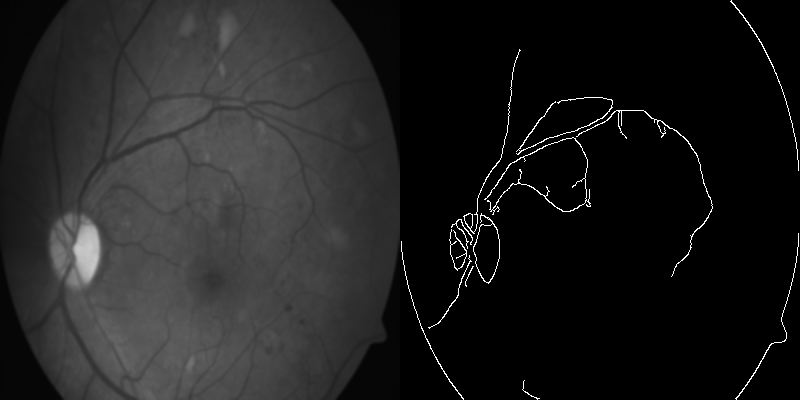

In [ ]:
edges = cv2.Canny(IMG_BLUR, threshold1=15, threshold2=100)
cv2_imshow(h_printer(IMG_BLUR, edges))

## Trial 3
- Lower thresh = 10
- Upper thresh = 75

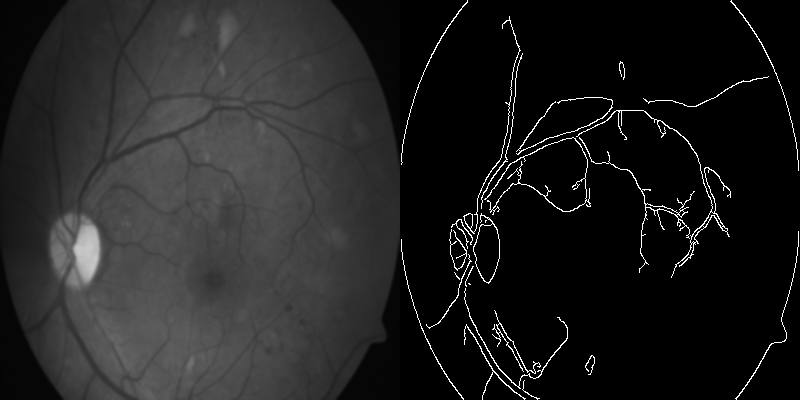

In [ ]:
edges = cv2.Canny(IMG_BLUR, threshold1=10, threshold2=75)
cv2_imshow(h_printer(IMG_BLUR, edges))

# Conclusion

Canny and Sobel are definitely better than Laplace. However, Canny strictly gives edges, while Sobel seems to have colour pattern realted info as well. As diabetic retinopathy detection focusses on detection using these colouration based characteristics, in my opinioin, Sobel is a better choice for the task.